In [1]:
# ref: https://qiita.com/TaigaU121/items/1844cf1901c8ba4a3dee
import pandas as pd

from matplotlib import pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.anova as anova # 分散分析やるライブラリ
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Tukeyの多重比較やるライブラリ

from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import glob, os

In [2]:
# load and gather data
datapath = os.path.join('.', 'hexoskin', 'impact', 'all-hr.xlsx')

df = pd.read_excel(datapath)
df

,filename,average,std,max,kind,distance,0,1,2,3,4,5,6,7,8,9
0,nov-hori,55.9,2.547548,59,nov,0.5,54,53,54,54,54,59,59,59,59,54
1,nov-maeda,79.7,0.458258,80,nov,0.5,79,79,79,80,80,80,80,80,80,80
2,nov-imanishi,82.2,0.979796,83,nov,0.5,82,82,83,83,83,83,83,82,81,80
3,nov-takagi,113.1,1.300000,115,nov,0.5,111,112,112,112,113,113,114,114,115,115
4,nov-kanata,104.3,2.758623,108,nov,0.5,108,108,107,106,105,103,103,102,101,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,pro-yamada,78.0,1.000000,79,pro,6.0,76,77,77,78,79,79,79,79,78,78
120,pro-yoshida,95.6,0.489898,96,pro,6.0,96,96,96,96,96,96,95,95,95,95
121,pro-mitu,81.1,1.972308,83,pro,6.0,83,83,83,83,82,81,81,79,78,78
122,pro-ikinaga,104.9,1.374773,106,pro,6.0,106,106,106,106,106,105,105,104,103,102


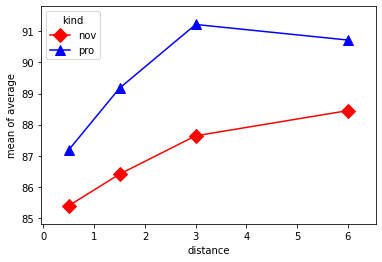

In [3]:
fig = interaction_plot(df.distance, df.kind, df.average, # (横軸にする要因（水準多い方），系列にする要因（水準少ない方），評価指標)
             colors=['red','blue'], markers=['D','^'], ms=10)

In [4]:
formula = 'average ~ (kind) + (distance) + (kind):(distance)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table) #被験者間効果の検定結果を出力

                     sum_sq     df         F    PR(>F)
kind             192.081335    1.0  1.310240  0.254629
distance         162.023230    1.0  1.105206  0.295239
kind:distance      0.245149    1.0  0.001672  0.967449
Residual       17592.008996  120.0       NaN       NaN


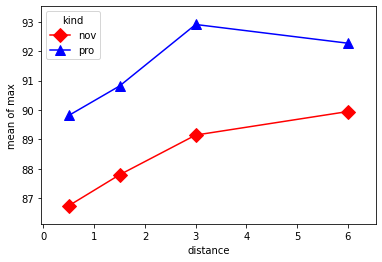

In [5]:
fig = interaction_plot(df.distance, df.kind, df['max'], # (横軸にする要因（水準多い方），系列にする要因（水準少ない方），評価指標)
             colors=['red','blue'], markers=['D','^'], ms=10)

In [6]:
formula = 'max ~ (kind) + (distance) + (kind):(distance)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table) #被験者間効果の検定結果を出力

                     sum_sq     df         F    PR(>F)
kind             262.695345    1.0  1.719246  0.192294
distance         142.709794    1.0  0.933984  0.335773
kind:distance      1.968648    1.0  0.012884  0.909817
Residual       18335.618149  120.0       NaN       NaN
